In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#create reference to csv file
days_to_pend = pd.read_csv("Resources/AverageDaystoPending.csv")
#read the csv into a Pandas DataFrame

#print csv
days_to_pend.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
0,102001,0,United States,country,NaN,31.0,21.0,19.0,18.0,20.0,...,7.0,6.0,6.0,7.0,9.0,12.0,15.0,17.0,19.0,23.0
1,394913,1,"New York, NY",msa,NY,58.0,43.0,38.0,40.0,43.0,...,32.0,23.0,21.0,22.0,25.0,29.0,33.0,34.0,35.0,38.0
2,753899,2,"Los Angeles, CA",msa,CA,17.0,14.0,15.0,15.0,17.0,...,10.0,10.0,10.0,11.0,14.0,17.0,20.0,22.0,23.0,27.0
3,394463,3,"Chicago, IL",msa,IL,32.0,17.0,15.0,16.0,18.0,...,9.0,6.0,6.0,6.0,8.0,10.0,13.0,15.0,18.0,23.0
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,...,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0


In [3]:
#narrow down results to 5 cities
days_to_pending = days_to_pend[(days_to_pend['RegionName'] == 'Philadelphia, PA') | (days_to_pend['RegionName'] == 'Phoenix, AZ') | (days_to_pend['RegionName'] == 'San Antonio, TX') \
                               | (days_to_pend['RegionName'] == 'San Diego, CA') | (days_to_pend['RegionName'] == 'Dallas, TX')]

days_to_pending

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
4,394514,4,"Dallas, TX",msa,TX,27.0,21.0,20.0,20.0,22.0,...,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0
8,394974,8,"Philadelphia, PA",msa,PA,46.0,33.0,27.0,29.0,29.0,...,8.0,7.0,7.0,7.0,9.0,10.0,11.0,11.0,12.0,15.0
10,394976,10,"Phoenix, AZ",msa,AZ,29.0,25.0,25.0,25.0,26.0,...,8.0,7.0,8.0,10.0,15.0,21.0,28.0,35.0,40.0,46.0
17,395056,17,"San Diego, CA",msa,CA,16.0,14.0,14.0,16.0,23.0,...,7.0,7.0,7.0,9.0,12.0,16.0,19.0,21.0,21.0,25.0
24,395055,24,"San Antonio, TX",msa,TX,42.0,32.0,30.0,30.0,31.0,...,7.0,6.0,6.0,6.0,8.0,11.0,15.0,19.0,23.0,29.0


In [4]:
#remove unwanted columns
days_to_pendin = days_to_pending.loc[:,days_to_pending.columns != 'RegionID']
days_to_pendi = days_to_pendin.loc[:,days_to_pendin.columns != 'SizeRank']
days_to_pend = days_to_pendi.loc[:,days_to_pendi.columns != 'RegionType']
days_to_pen = days_to_pend.loc[:,days_to_pend.columns != 'StateName']
days_to_pen


,RegionName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
4,"Dallas, TX",27.0,21.0,20.0,20.0,22.0,25.0,28.0,31.0,35.0,...,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0
8,"Philadelphia, PA",46.0,33.0,27.0,29.0,29.0,29.0,27.0,29.0,32.0,...,8.0,7.0,7.0,7.0,9.0,10.0,11.0,11.0,12.0,15.0
10,"Phoenix, AZ",29.0,25.0,25.0,25.0,26.0,26.0,25.0,25.0,29.0,...,8.0,7.0,8.0,10.0,15.0,21.0,28.0,35.0,40.0,46.0
17,"San Diego, CA",16.0,14.0,14.0,16.0,23.0,25.0,28.0,28.0,32.0,...,7.0,7.0,7.0,9.0,12.0,16.0,19.0,21.0,21.0,25.0
24,"San Antonio, TX",42.0,32.0,30.0,30.0,31.0,32.0,35.0,39.0,42.0,...,7.0,6.0,6.0,6.0,8.0,11.0,15.0,19.0,23.0,29.0


In [5]:
days_to_pen.set_index("RegionName", inplace=True)
days_to_pen

,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,...,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
RegionName,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",27.0,21.0,20.0,20.0,22.0,25.0,28.0,31.0,35.0,38.0,...,11.0,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0
"Philadelphia, PA",46.0,33.0,27.0,29.0,29.0,29.0,27.0,29.0,32.0,37.0,...,8.0,7.0,7.0,7.0,9.0,10.0,11.0,11.0,12.0,15.0
"Phoenix, AZ",29.0,25.0,25.0,25.0,26.0,26.0,25.0,25.0,29.0,34.0,...,8.0,7.0,8.0,10.0,15.0,21.0,28.0,35.0,40.0,46.0
"San Diego, CA",16.0,14.0,14.0,16.0,23.0,25.0,28.0,28.0,32.0,37.0,...,7.0,7.0,7.0,9.0,12.0,16.0,19.0,21.0,21.0,25.0
"San Antonio, TX",42.0,32.0,30.0,30.0,31.0,32.0,35.0,39.0,42.0,43.0,...,7.0,6.0,6.0,6.0,8.0,11.0,15.0,19.0,23.0,29.0


In [6]:
days_to_pen_clean = days_to_pen.transpose()
days_to_pen_clean

RegionName,"Dallas, TX","Philadelphia, PA","Phoenix, AZ","San Diego, CA","San Antonio, TX"
2018-03-31,27.0,46.0,29.0,16.0,42.0
2018-04-30,21.0,33.0,25.0,14.0,32.0
2018-05-31,20.0,27.0,25.0,14.0,30.0
2018-06-30,20.0,29.0,25.0,16.0,30.0
2018-07-31,22.0,29.0,26.0,23.0,31.0
2018-08-31,25.0,29.0,26.0,25.0,32.0
2018-09-30,28.0,27.0,25.0,28.0,35.0
2018-10-31,31.0,29.0,25.0,28.0,39.0
2018-11-30,35.0,32.0,29.0,32.0,42.0
2018-12-31,38.0,37.0,34.0,37.0,43.0


In [8]:
#rename columns
days_to_pen_clean.rename(index = {'2018-03-31':'2018 March',
                                  '2018-04-30':'2018 April',
                                  '2018-05-31':'2018 May',
                                  '2018-06-30':'2018 June',
                                  '2018-07-31':'2018 July',
                                  '2018-08-31':'2018 Aug',
                                  '2018-09-30':'2018 Sept',
                                  '2018-10-31':'2018 Oct',
                                  '2018-11-30':'2018 Nov',
                                  '2018-12-31':'2018 Dec',
                                  '2019-01-31':'2019 Jan',
                                  '2019-02-28':'2019 Feb',
                                  '2019-03-31':'2019 March',
                                  '2019-04-30':'2019 April',
                                  '2019-05-31':'2019 May',
                                  '2019-06-30':'2019 June',
                                  '2019-07-31':'2019 July',
                                  '2019-08-31':'2019 Aug',
                                  '2019-09-30':'2019 Sept',
                                  '2019-10-31':'2019 Oct',
                                  '2019-11-30':'2019 Nov',
                                  '2019-12-31':'2019 Dec',
                                  '2020-01-31':'2020 Jan',
                                  '2020-02-29':'2020 Feb',
                                  '2020-03-31':'2020 March',
                                  '2020-04-30':'2020 April',
                                  '2020-05-31':'2020 May',
                                  '2020-06-30':'2020 June',
                                  '2020-07-31':'2020 July',
                                  '2020-07-31':'2020 Aug',
                                  '2020-09-30':'2020 Sept',
                                  '2020-10-31':'2020 Oct',
                                  '2020-11-30':'2020 Nov',
                                  '2020-12-31':'2020 Dec',
                                  '2021-01-31':'2021 Jan',
                                  '2021-02-28':'2021 Feb',
                                  '2021-03-31':'2021 March',
                                  '2021-04-30':'2021 April',
                                  '2021-05-31':'2021 May',
                                  '2021-06-30':'2021 June',
                                  '2021-07-31':'2021 July',
                                  '2021-07-31':'2021 Aug',
                                  '2021-09-30':'2021 Sept',
                                  '2021-10-31':'2021 Oct',
                                  '2021-11-30':'2021 Nov',
                                  '2021-12-31':'2021 Dec',
                                  '2022-01-31':'2022 Jan',
                                  '2022-02-28':'2022 Feb',
                                  '2022-03-31':'2022 March',
                                  '2022-04-30':'2022 April',
                                  '2022-05-31':'2022 May',
                                  '2022-06-30':'2022 June',
                                  '2022-07-31':'2022 July',
                                  '2022-08-31':'2022 Aug',
                                  '2022-09-30':'2022 Sept',
                                  '2022-10-31':'2022 Oct',
                                  '2022-11-30':'2022 Nov',
                                  '2022-12-31':'2022 Dec'}, inplace=True)

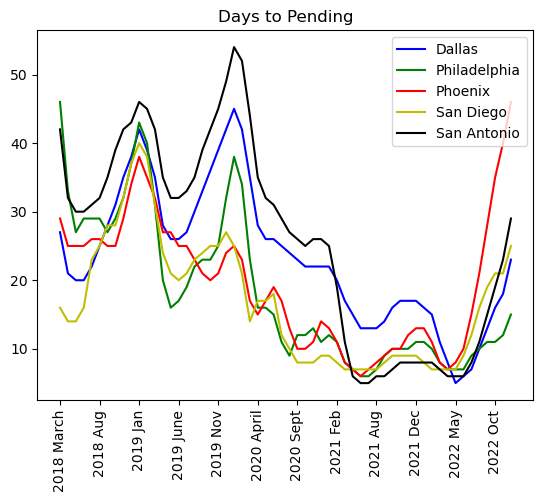

In [14]:
plt.plot(days_to_pen_clean["Dallas, TX"], 'b-', label = "Dallas")
plt.plot(days_to_pen_clean["Philadelphia, PA"], 'g-', label = "Philadelphia")
plt.plot(days_to_pen_clean["Phoenix, AZ"], 'r-', label = "Phoenix")
plt.plot(days_to_pen_clean["San Diego, CA"], 'y-', label = "San Diego")
plt.plot(days_to_pen_clean["San Antonio, TX"], 'k-', label = "San Antonio")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.title("Days to Pending")
plt.legend()
plt.savefig("output_data")


In [47]:
# dates = days_to_pen_clean.len(:,0)

In [48]:
# x = np.arange(0, len(days_to_pen))

# plt.plot(dates, days_to_pen["Dallas, TX"], 'b-', label = "Dallas")
# plt.plot(dates, days_to_pen["Philadelphia, PA"], 'g-', label = "Philadelphia")
# plt.plot(dates, days_to_pen["Phoenix, AZ"], 'r-', label = "Phoenix")
# plt.plot(dates, days_to_pen["San Diego, CA"], 'y-', label = "San Diego")
# plt.plot(dates, days_to_pen["San Antonio, TX"], 'k-', label = "San Antonio")

# plt.xticks(range(0, 60, 5), rotation = 90)
# plt.title("Days to Pending")
# plt.legend()
# plt.show()
